In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    precision_recall_curve,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (1).zip


In [5]:
import pandas as pd
df = pd.read_csv("/content/archive.zip")
print("Shape:", df.shape)

Shape: (284807, 31)


In [6]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [7]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0,0.998273
1,0.001727


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train Fraud Rate:", y_train.mean())
print("Test Fraud Rate:", y_test.mean())

Train Fraud Rate: 0.001729245759178389
Test Fraud Rate: 0.0017204452090867595


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_prob = lr.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

ROC-AUC: 0.9513502678786764
PR-AUC: 0.7245373323624209


In [14]:
from sklearn.metrics import confusion_matrix

# Default threshold
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

print("\nTP:", tp)
print("FP:", fp)
print("FN:", fn)
print("TN:", tn)

Confusion Matrix:
[[56851    13]
 [   30    68]]

TP: 68
FP: 13
FN: 30
TN: 56851


In [15]:
import numpy as np

def calculate_loss(threshold):
    y_pred = (y_pred_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    loss = (fn * 1000) + (fp * 10)
    return loss

thresholds = np.linspace(0.01, 0.99, 50)

losses = []

for t in thresholds:
    losses.append(calculate_loss(t))

best_threshold = thresholds[np.argmin(losses)]
best_loss = min(losses)

print("Best Threshold:", best_threshold)
print("Minimum Financial Loss:", best_loss)

Best Threshold: 0.01
Minimum Financial Loss: 15030


In [16]:
# Predictions at optimal threshold
optimal_threshold = 0.01
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

cm_opt = confusion_matrix(y_test, y_pred_optimal)
tn, fp, fn, tp = cm_opt.ravel()

print("Confusion Matrix at Optimal Threshold:")
print(cm_opt)

print("\nTP:", tp)
print("FP:", fp)
print("FN:", fn)
print("TN:", tn)

Confusion Matrix at Optimal Threshold:
[[56561   303]
 [   12    86]]

TP: 86
FP: 303
FN: 12
TN: 56561


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)[:, 1]
print("RF ROC-AUC:", roc_auc_score(y_test, rf_probs))
print("RF PR-AUC:", average_precision_score(y_test, rf_probs))

RF ROC-AUC: 0.9630272515590367
RF PR-AUC: 0.8733910547021404


In [18]:
def calculate_loss_rf(threshold):
    y_pred = (rf_probs >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    loss = (fn * 1000) + (fp * 10)
    return loss

thresholds = np.linspace(0.01, 0.99, 50)

rf_losses = []

for t in thresholds:
    rf_losses.append(calculate_loss_rf(t))

best_threshold_rf = thresholds[np.argmin(rf_losses)]
best_loss_rf = min(rf_losses)

print("Best RF Threshold:", best_threshold_rf)
print("Minimum RF Financial Loss:", best_loss_rf)

Best RF Threshold: 0.06999999999999999
Minimum RF Financial Loss: 10560


In [19]:
optimal_threshold_rf = best_threshold_rf
y_pred_rf_opt = (rf_probs >= optimal_threshold_rf).astype(int)

cm_rf = confusion_matrix(y_test, y_pred_rf_opt)
tn, fp, fn, tp = cm_rf.ravel()

print("Confusion Matrix (RF Optimal Threshold):")
print(cm_rf)

print("\nTP:", tp)
print("FP:", fp)
print("FN:", fn)
print("TN:", tn)

Confusion Matrix (RF Optimal Threshold):
[[56808    56]
 [   10    88]]

TP: 88
FP: 56
FN: 10
TN: 56808


In [20]:
optimal_threshold_rf = best_threshold_rf
y_pred_rf_opt = (rf_probs >= optimal_threshold_rf).astype(int)

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf_opt)
tn, fp, fn, tp = cm_rf.ravel()

print("Confusion Matrix (RF Optimal Threshold):")
print(cm_rf)

print("\nTP:", tp)
print("FP:", fp)
print("FN:", fn)
print("TN:", tn)

# Calculate recall and precision
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("\nRecall:", recall)
print("Precision:", precision)


Confusion Matrix (RF Optimal Threshold):
[[56808    56]
 [   10    88]]

TP: 88
FP: 56
FN: 10
TN: 56808

Recall: 0.8979591836734694
Precision: 0.6111111111111112


V17    0.170325
V14    0.136363
V12    0.133326
V10    0.074073
V16    0.071792
V11    0.045277
V9     0.031127
V4     0.030496
V18    0.028156
V7     0.024627
dtype: float64


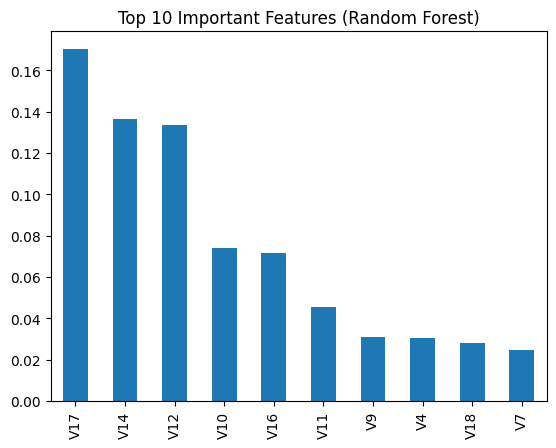

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(feature_importance.head(10))

# Plot top 10
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

In [22]:
def fraud_decision_engine(transaction_row, threshold=optimal_threshold_rf):

    # Convert to DataFrame (single row)
    transaction_df = pd.DataFrame([transaction_row])

    # Predict probability
    fraud_prob = rf.predict_proba(transaction_df)[:, 1][0]

    # Decision logic
    if fraud_prob >= threshold:
        decision = "FLAG_FOR_REVIEW"
    else:
        decision = "APPROVE"

    return fraud_prob, decision

In [23]:
sample_transaction = X_test.iloc[0].to_dict()

prob, decision = fraud_decision_engine(sample_transaction)

print("Fraud Probability:", prob)
print("Decision:", decision)

Fraud Probability: 0.0
Decision: APPROVE


In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [25]:
rf_sm = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_sm.fit(X_train_sm, y_train_sm)
rf_sm_probs = rf_sm.predict_proba(X_test)[:, 1]
print("RF + SMOTE ROC-AUC:", roc_auc_score(y_test, rf_sm_probs))
print("RF + SMOTE PR-AUC:", average_precision_score(y_test, rf_sm_probs))

RF + SMOTE ROC-AUC: 0.9644234399584257
RF + SMOTE PR-AUC: 0.8740809794187884


In [26]:
def calculate_loss_rf_sm(threshold):
    y_pred = (rf_sm_probs >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return (fn * 1000) + (fp * 10)
thresholds = np.linspace(0.01, 0.99, 50)
rf_sm_losses = [calculate_loss_rf_sm(t) for t in thresholds]
best_threshold_rf_sm = thresholds[np.argmin(rf_sm_losses)]
best_loss_rf_sm = min(rf_sm_losses)
print("Best RF+SMOTE Threshold:", best_threshold_rf_sm)
print("Minimum RF+SMOTE Loss:", best_loss_rf_sm)

Best RF+SMOTE Threshold: 0.17
Minimum RF+SMOTE Loss: 9920


In [27]:
!pip install xgboost

In [28]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators = 200,
    max_depth = 4,
    learning_rate = 0.1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    eval_metrics = "logloss",
    random_state = 42,
    n_jobs = -1

)
xgb.fit(X_train, y_train)
xgb_probs = xgb.predict_proba(X_test)[:,1]
print("XGB ROC-AUC:", roc_auc_score(y_test, xgb_probs))
print("XGB PR-AUC:", average_precision_score(y_test, xgb_probs))

XGB ROC-AUC: 0.9786081075649169
XGB PR-AUC: 0.8732680926868481


In [29]:
def calculate_loss_xgb(threshold):
    y_pred = (xgb_probs >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return (fn * 1000) + (fp * 10)

xgb_losses = [calculate_loss_xgb(t) for t in thresholds]

best_threshold_xgb = thresholds[np.argmin(xgb_losses)]
best_loss_xgb = min(xgb_losses)

print("Best XGB Threshold:", best_threshold_xgb)
print("Minimum XGB Loss:", best_loss_xgb)

Best XGB Threshold: 0.01
Minimum XGB Loss: 12180


In [30]:
!pip install lightgbm

In [31]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    n_estimators=200,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42
)

lgb.fit(X_train, y_train)

lgb_probs = lgb.predict_proba(X_test)[:, 1]

print("LGBM ROC-AUC:", roc_auc_score(y_test, lgb_probs))
print("LGBM PR-AUC:", average_precision_score(y_test, lgb_probs))

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.395637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [32]:
def calculate_loss_lgb(threshold):
    y_pred = (lgb_probs >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return (fn * 1000) + (fp * 10)

lgb_losses = [calculate_loss_lgb(t) for t in thresholds]

best_threshold_lgb = thresholds[np.argmin(lgb_losses)]
best_loss_lgb = min(lgb_losses)

print("Best LGB Threshold:", best_threshold_lgb)
print("Minimum LGB Loss:", best_loss_lgb)

Best LGB Threshold: 0.01
Minimum LGB Loss: 35520


In [33]:
comparison = pd.DataFrame({
    "Model": [
        "Logistic (Optimized)",
        "Random Forest",
        "Random Forest + SMOTE",
        "XGBoost",
        "LightGBM"
    ],
    "Min Financial Loss": [
        15030,
        10560,
        best_loss_rf_sm,
        best_loss_xgb,
        best_loss_lgb
    ]
})

comparison.sort_values("Min Financial Loss")

,Model,Min Financial Loss
2,Random Forest + SMOTE,9920
1,Random Forest,10560
3,XGBoost,12180
0,Logistic (Optimized),15030
4,LightGBM,35520


In [34]:
comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Random Forest + SMOTE"
    ],
    "Minimum Financial Loss ($)": [
        15030,
        10560,
        9920
    ]
})

comparison["Improvement vs Logistic (%)"] = (
    (15030 - comparison["Minimum Financial Loss ($)"]) / 15030 * 100
)

comparison.sort_values("Minimum Financial Loss ($)")

,Model,Minimum Financial Loss ($),Improvement vs Logistic (%)
2,Random Forest + SMOTE,9920,33.998669
1,Random Forest,10560,29.740519
0,Logistic Regression,15030,0.000000
